<a href="https://colab.research.google.com/github/dibsondivya/ai-health-event/blob/main/TF_IDF_%26_Various_Classification_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#### Installation of H2O and nltk (Uncomment below 4 lines)
!apt-get install default-jre
!java -version
!pip install h2o
!pip install nltk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 41 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=24da45d9d74096afc3acf1f1986dabf10e914bee6e1734ac03fc0aa0621e01a2
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f0

# Preliminary Processing

In [ ]:
### Import Libraries
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz4ba8eek
  JVM stdout: /tmp/tmpz4ba8eek/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz4ba8eek/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_0zoijo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
## Retrieve and process train and test dataset
twitter =pd.read_csv('/content/drive/MyDrive/AI Project/train_textcleaned.csv')
test =pd.read_csv('/content/drive/MyDrive/AI Project/test_textcleaned.csv')
twitter['label'].value_counts()

1    1719
0     876
2     366
3     214
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

## Split train set to train and validation
train, val_set = train_test_split(twitter, test_size=0.2, random_state=8888)

In [ ]:
## install the library from NLTK that will perform tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer

## Initialise Stemming Algorithm
stemmer = nltk.stem.SnowballStemmer('english')

In [ ]:
## Download Stop Words
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

## Create a function to perform all test preprocessing steps using RegEx module
def preprocessing(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

# TF- IDF Processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Initialise tf-idf vectorsizer function
vectorizer_tf = TfidfVectorizer(tokenizer=preprocessing, stop_words=None, max_df=0.5, max_features=1000, lowercase=False, ngram_range=(1,2))

train_vectors = vectorizer_tf.fit_transform(train.tweet) 
val_set_vectors = vectorizer_tf.transform(val_set.tweet)
test_vectors = vectorizer_tf.transform(test.tweet)

In [ ]:
## Convert Train, Val_Set and Test Set to dataframe
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
val_set_df=pd.DataFrame(val_set_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_df

,....,72-year-old,72-year-old alzheim,abl,abus,accept,account,activ,actual,ad,...,wrap,write,wrong,y'all,yeah,year,yesterday,young,youtub,youtub video
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.350682,0.0,0.0,0.0,0.0
1358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
## Adding the label column to TF-IDFed dataframes
train_df=pd.concat([train_df,train['label'].reset_index(drop=True)], axis=1)
val_set_df=pd.concat([val_set_df,val_set['label'].reset_index(drop=True)], axis=1)
test_df=pd.concat([test_df,test['label'].reset_index(drop=True)], axis=1)

In [ ]:
## Convert all 3 sets to H2o Frames
h2o_train_df = h2o.H2OFrame(train_df)
h2o_val_set_df = h2o.H2OFrame(val_set_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
## Convert label column to factor type
h2o_train_df['label'] = h2o_train_df['label'].asfactor()
h2o_val_set_df['label'] = h2o_val_set_df['label'].asfactor()
h2o_test_df['label'] = h2o_test_df['label'].asfactor()

In [ ]:
## Specify the x and y variables
x=vectorizer_tf.get_feature_names()
y='label'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# AutoML Deep Learning Algorithm Search & Performance


In [ ]:
## Initialise automl
aml = H2OAutoML(max_models = 60, seed = 8888, verbosity="info", 
                include_algos = ["XGBoost"],nfolds=0, balance_classes=True, max_after_balance_size=0.3)

In [ ]:
## Train AutoML Model
aml.train(x = x, y = y, training_frame = h2o_train_df, validation_frame=h2o_val_set_df)

AutoML progress: |
06:00:11.55: Project: AutoML_3_20220619_60011
06:00:11.55: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:00:11.55: Setting stopping tolerance adaptively based on the training frame: 0.019841894753313626
06:00:11.55: Build control seed: 8888
06:00:11.60: training frame: Frame key: AutoML_3_20220619_60011_training_py_1_sid_997f    cols: 1001    rows: 2540  chunks: 3    size: 453032  checksum: 286996856487386210
06:00:11.62: validation frame: Frame key: py_2_sid_997f    cols: 1001    rows: 635  chunks: 1    size: 131039  checksum: -2240119787865610152
06:00:11.63: leaderboard frame: Frame key: py_2_sid_997f    cols: 1001    rows: 635  chunks: 1    size: 131039  checksum: -2240119787865610152
06:00:11.63: blending frame: NULL
06:00:11.64: response column: label
06:00:11.64: fold column: null
06:00:11.64: weights column: null
06:00:11.64: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_se

,,number_of_trees
0,,40.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.11442751610847217
RMSE: 0.3382713646001863
LogLoss: 0.3767136717172038
Mean Per-Class Error: 0.20564514760723415
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,612.0,70.0,0.0,4.0,0.107872,74 / 686
1,62.0,1327.0,1.0,2.0,0.046695,"65 / 1,392"
2,38.0,82.0,176.0,1.0,0.407407,121 / 297
3,17.0,26.0,0.0,122.0,0.260606,43 / 165
4,729.0,1505.0,177.0,129.0,0.119291,"303 / 2,540"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.880709
1,2,0.974409
2,3,0.995669
3,4,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.21692661953786857
RMSE: 0.4657538185971947
LogLoss: 0.6979400074019649
Mean Per-Class Error: 0.4418547615548645
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,153.0,30.0,2.0,5.0,0.194737,37 / 190
1,22.0,288.0,5.0,12.0,0.119266,39 / 327
2,14.0,35.0,18.0,2.0,0.739130,51 / 69
3,8.0,27.0,0.0,14.0,0.714286,35 / 49
4,197.0,380.0,25.0,33.0,0.255118,162 / 635



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.744882
1,2,0.908661
2,3,0.971653
3,4,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-06-19 06:01:39,1 min 18.504 sec,0.0,0.750000,1.386294,0.451969,NaN,NaN,0.750000,1.386294,0.485039,NaN,NaN
1,,2022-06-19 06:01:39,1 min 18.872 sec,5.0,0.502483,0.720054,0.218110,NaN,NaN,0.545559,0.839104,0.278740,NaN,NaN
2,,2022-06-19 06:01:39,1 min 19.098 sec,10.0,0.433098,0.571682,0.192520,NaN,NaN,0.499128,0.749520,0.274016,NaN,NaN
3,,2022-06-19 06:01:39,1 min 19.323 sec,15.0,0.403319,0.507589,0.166535,NaN,NaN,0.482604,0.720351,0.267717,NaN,NaN
4,,2022-06-19 06:01:40,1 min 19.566 sec,20.0,0.383553,0.466568,0.151181,NaN,NaN,0.476523,0.713507,0.270866,NaN,NaN
5,,2022-06-19 06:01:40,1 min 19.894 sec,25.0,0.369227,0.436898,0.141732,NaN,NaN,0.471753,0.703847,0.261417,NaN,NaN
6,,2022-06-19 06:01:40,1 min 20.124 sec,30.0,0.358130,0.414331,0.135827,NaN,NaN,0.468964,0.699834,0.258268,NaN,NaN
7,,2022-06-19 06:01:40,1 min 20.368 sec,35.0,0.347329,0.394024,0.126772,NaN,NaN,0.466949,0.697631,0.253543,NaN,NaN
8,,2022-06-19 06:01:41,1 min 20.616 sec,40.0,0.338271,0.376714,0.119291,NaN,NaN,0.465754,0.697940,0.255118,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,depress,732.472717,1.000000,0.123887
1,alzheim,455.678436,0.622110,0.077071
2,stroke,418.467010,0.571307,0.070778
3,cancer,353.954620,0.483232,0.059866
4,heart attack,305.630981,0.417259,0.051693
5,diseas,221.919144,0.302973,0.037534
6,die,185.665070,0.253477,0.031403
7,risk,179.066650,0.244469,0.030286
8,heat,141.298294,0.192906,0.023899
9,attack,138.842072,0.189553,0.023483



See the whole table with table.as_data_frame()


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20220619_60011_model_37,0.441855,0.69794,0.465754,0.216927,2384,0.111997,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_56,0.444875,0.720223,0.464301,0.215575,2818,0.121821,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_35,0.450578,0.701156,0.464926,0.216156,2425,0.094506,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_18,0.457934,0.707042,0.470507,0.221377,1917,0.083673,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_52,0.458414,0.710975,0.46703,0.218117,2907,0.095107,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_5,0.458425,0.716485,0.470286,0.221169,2599,0.08685,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_19,0.459237,0.739284,0.486253,0.236442,2164,0.077784,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_1,0.459804,0.720478,0.473809,0.224495,2487,0.050244,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_40,0.460793,0.700091,0.471965,0.222751,2302,0.070072,XGBoost
XGBoost_grid_1_AutoML_3_20220619_60011_model_22,0.462008,0.743005,0.48295,0.23324,2230,0.064006,XGBoost


In [ ]:
# Get the best model using the metric
best_dl_model = aml.leader
#best_dl_model = h2o.get_model("XGBoost_grid_1_AutoML_2_20220619_13309_model_5")
best_dl_model.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'multinomial',
  'default': 'AUT

In [ ]:
# Retrieve the model's test performance
perf = best_dl_model.model_performance(h2o_test_df)
perf


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.2130679731641827
RMSE: 0.46159286515736214
LogLoss: 0.6748520642768667
Mean Per-Class Error: 0.4440936934381229
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,308.0,74.0,6.0,4.0,0.214286,84 / 392
1,55.0,639.0,13.0,30.0,0.132972,98 / 737
2,32.0,64.0,46.0,4.0,0.684932,100 / 146
3,16.0,48.0,0.0,22.0,0.744186,64 / 86
4,411.0,825.0,65.0,60.0,0.254225,"346 / 1,361"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.745775
1,2,0.914034
2,3,0.974284
3,4,1.000000


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_2_20220619_55654


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,287.0,90.0,11.0,4.0,0.267857,105 / 392
1,41.0,654.0,25.0,17.0,0.112619,83 / 737
2,24.0,56.0,62.0,4.0,0.575342,84 / 146
3,17.0,48.0,5.0,16.0,0.813953,70 / 86
4,369.0,848.0,103.0,41.0,0.251286,"342 / 1,361"


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

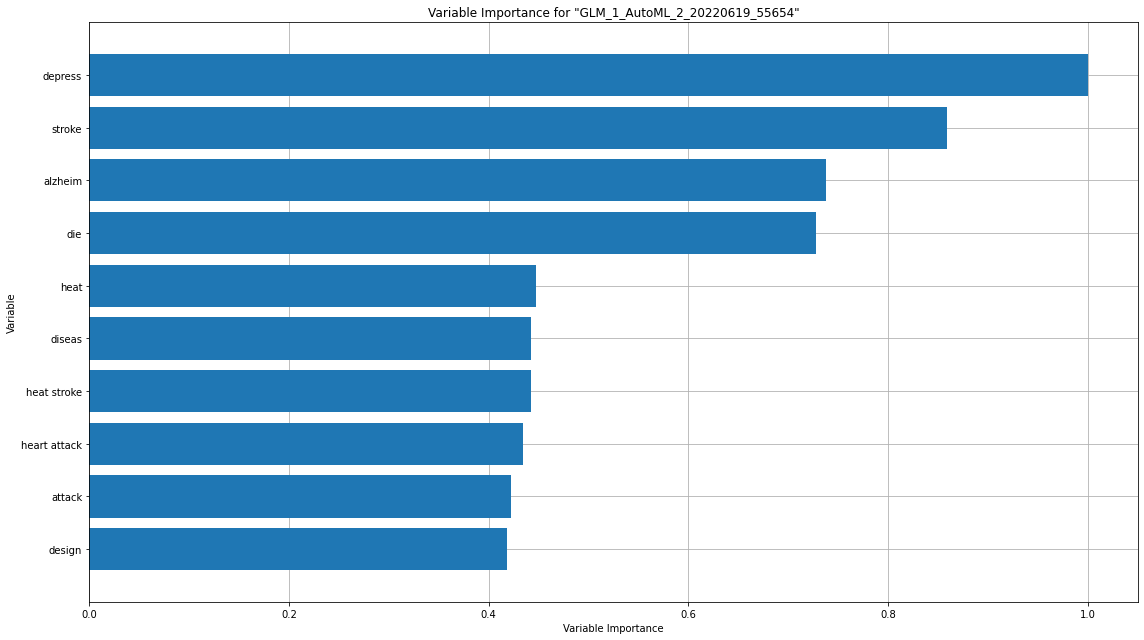

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

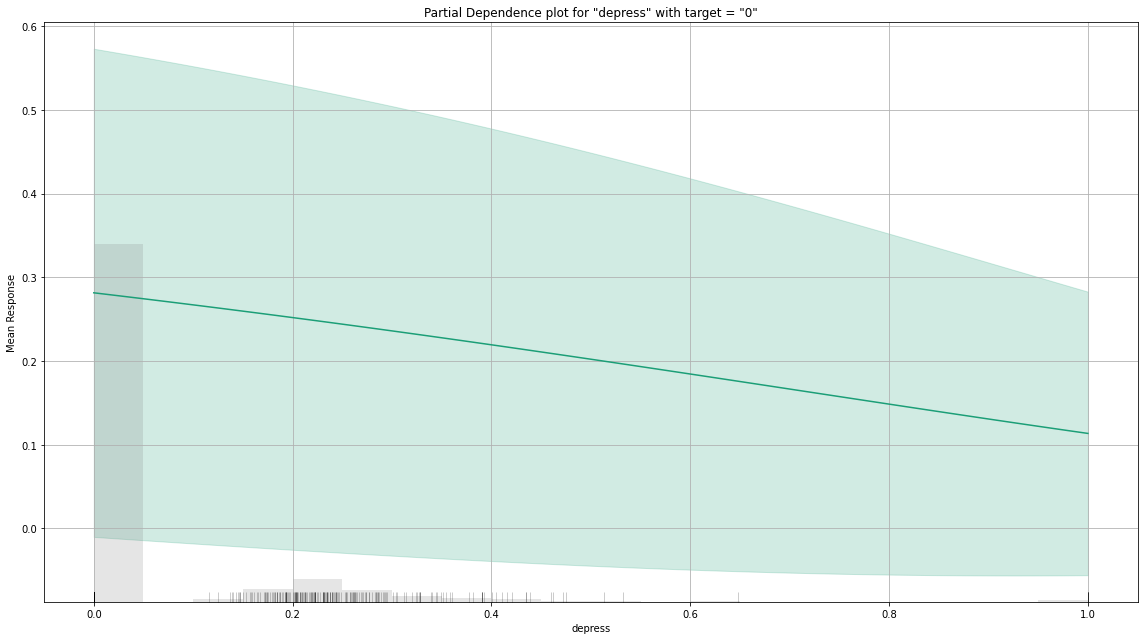

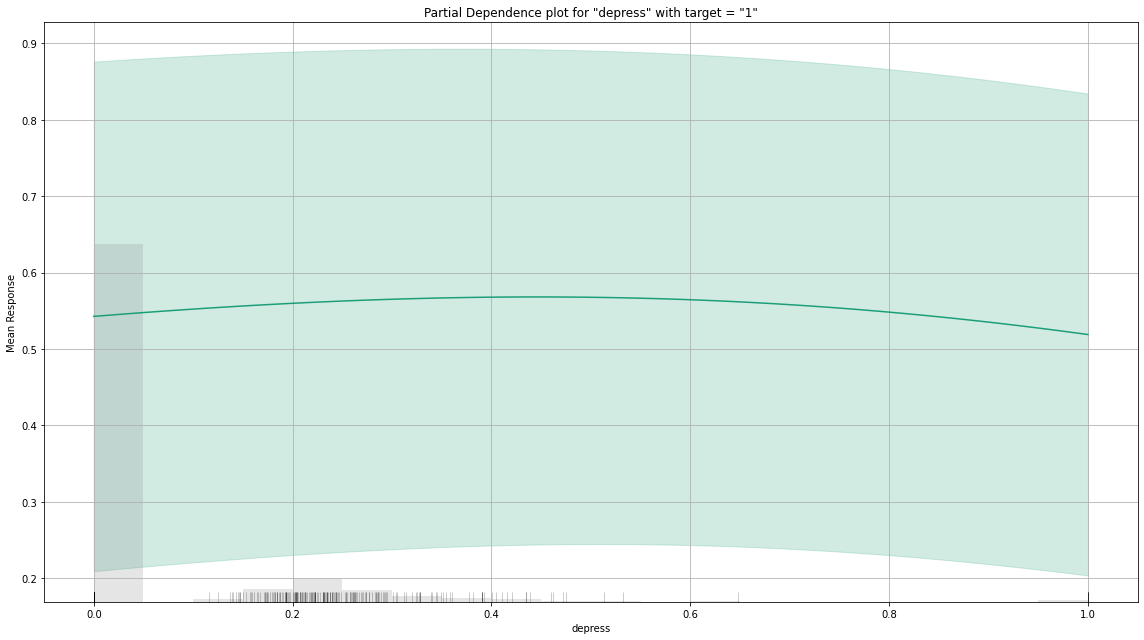

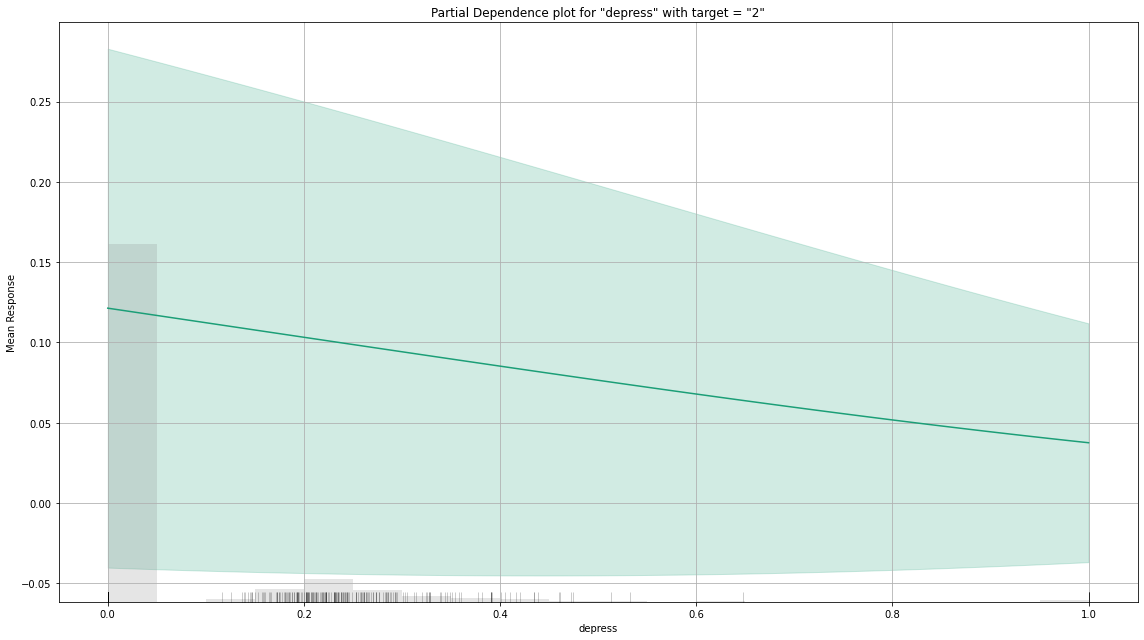

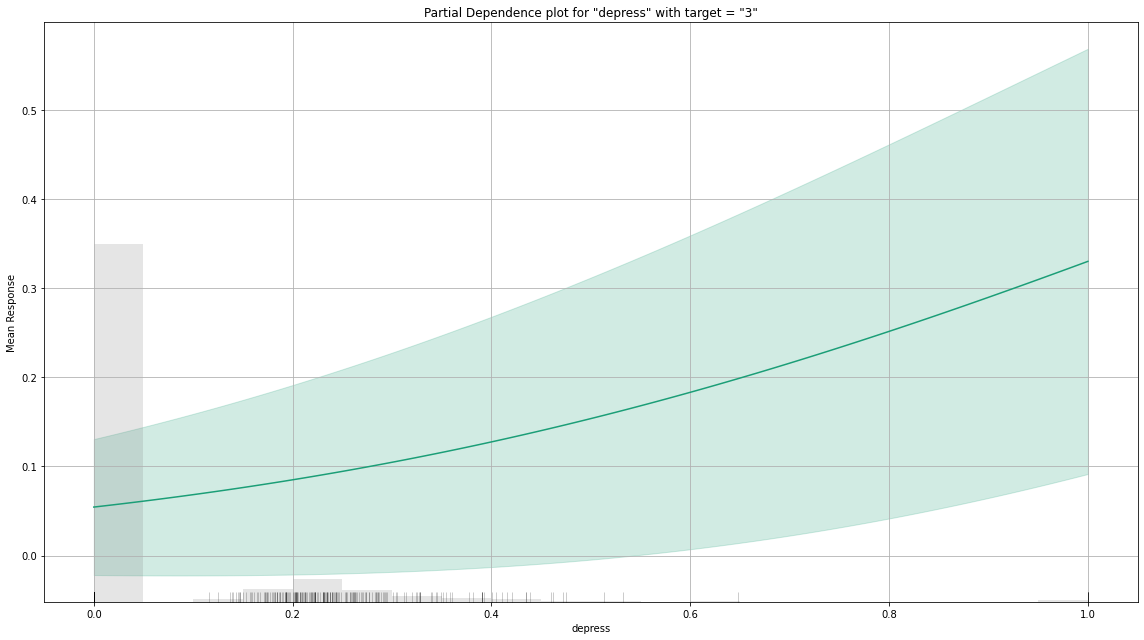

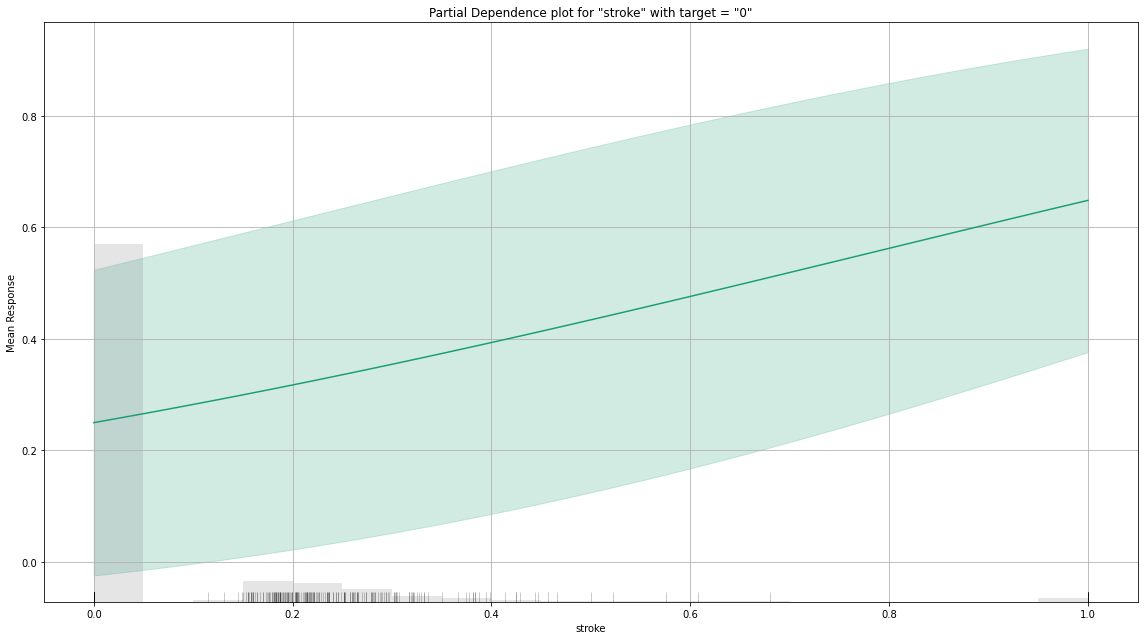

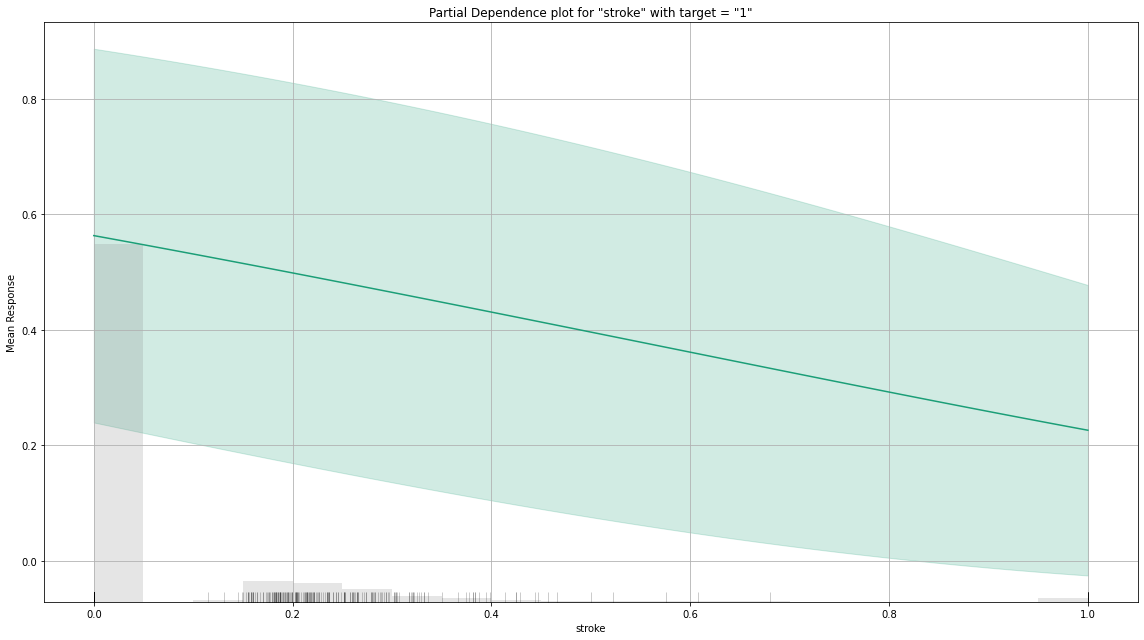

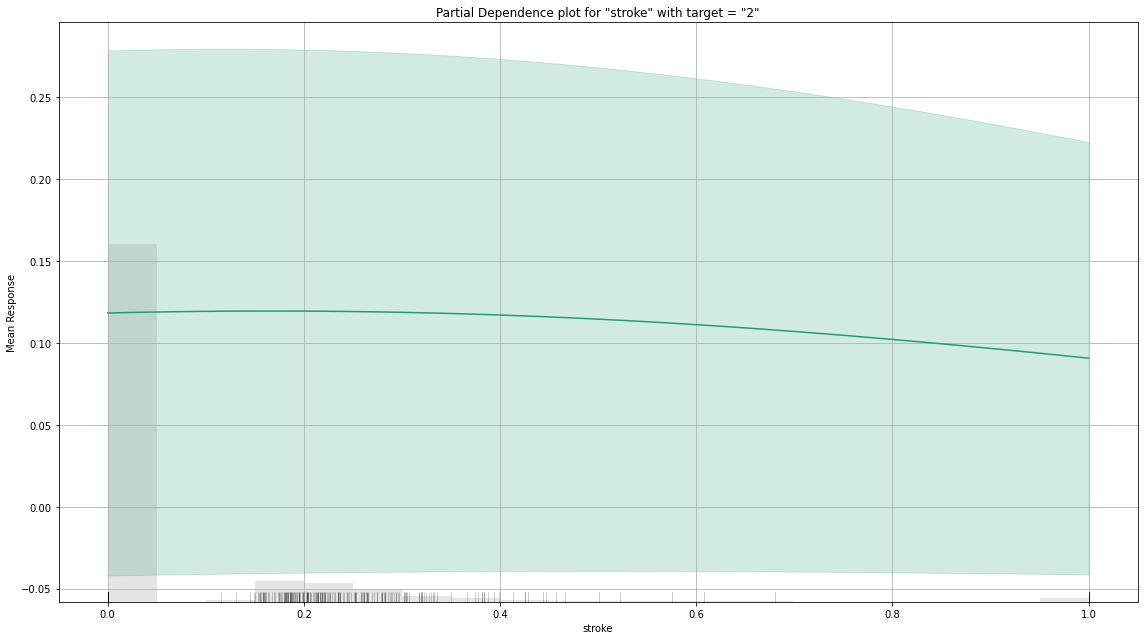

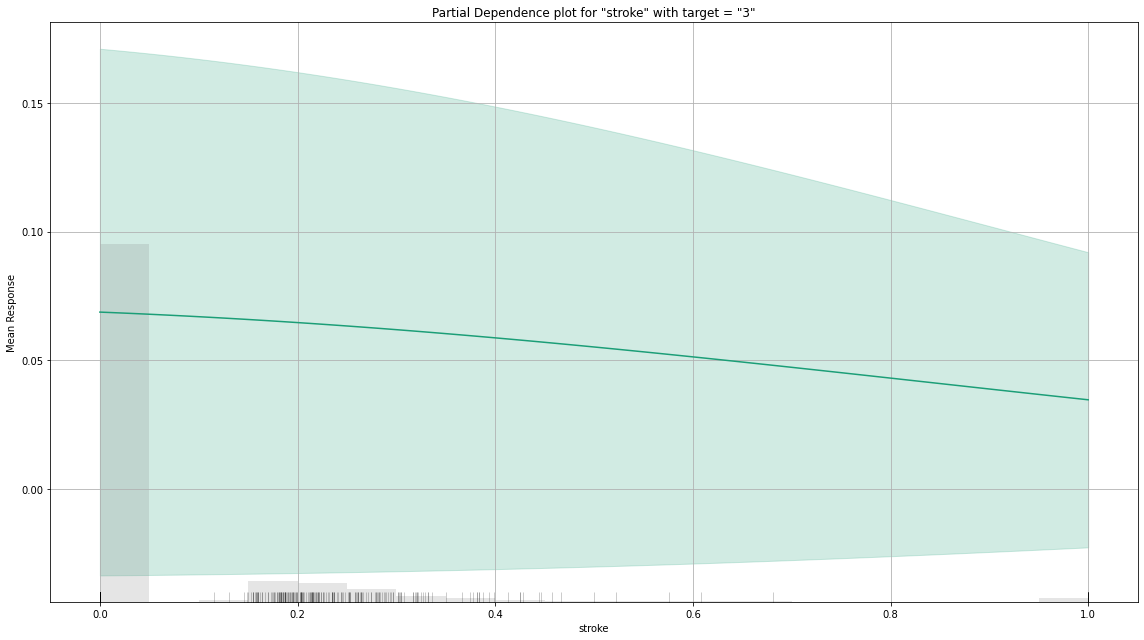

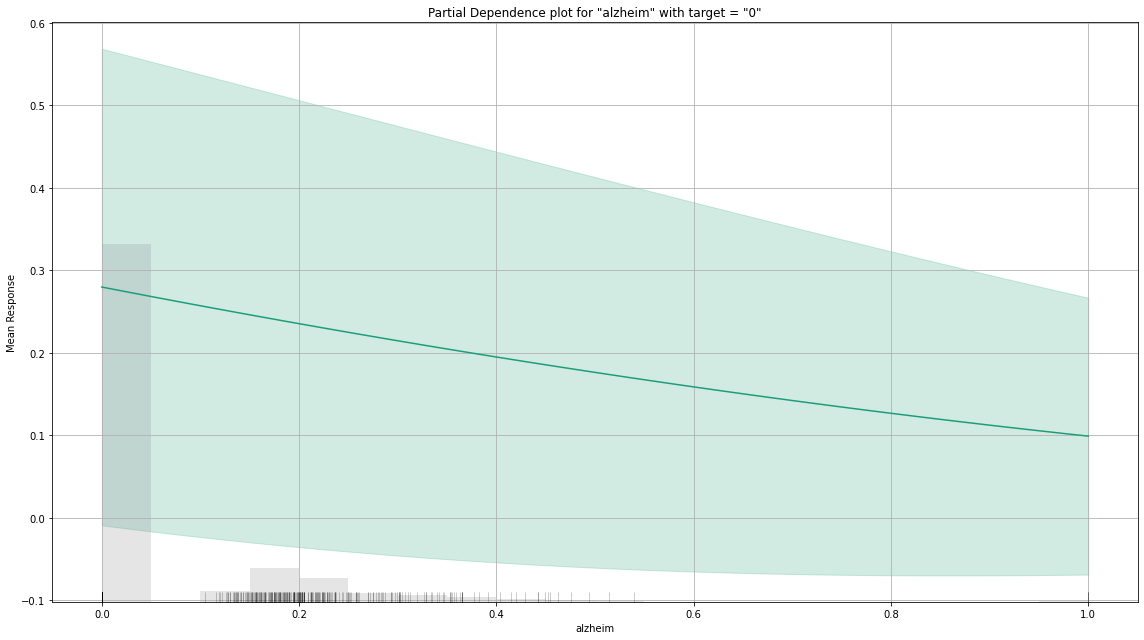

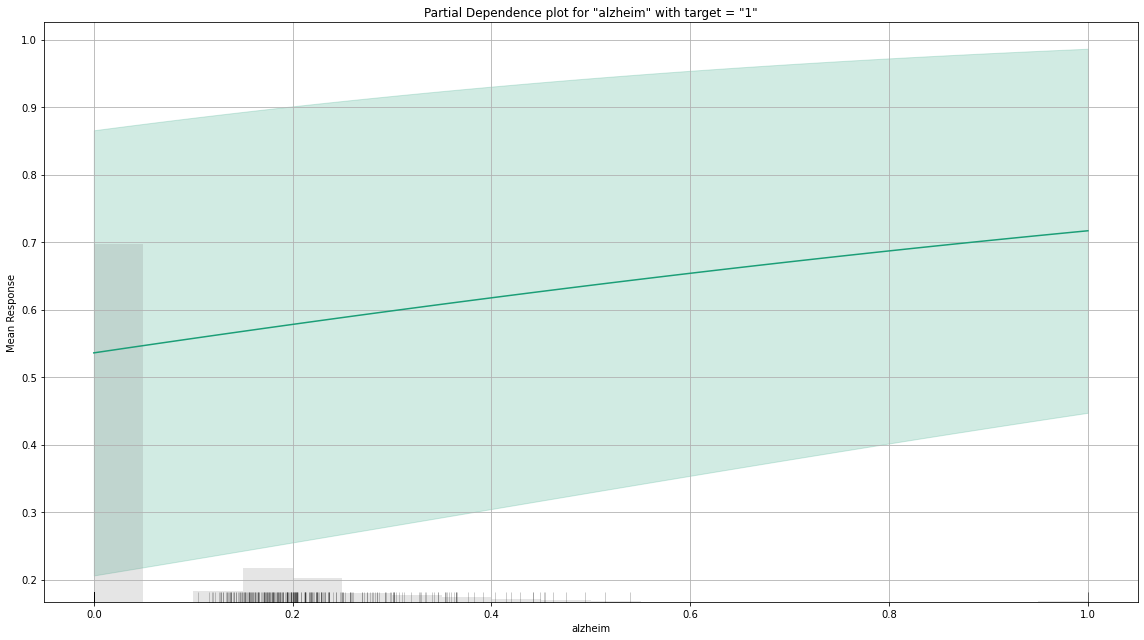

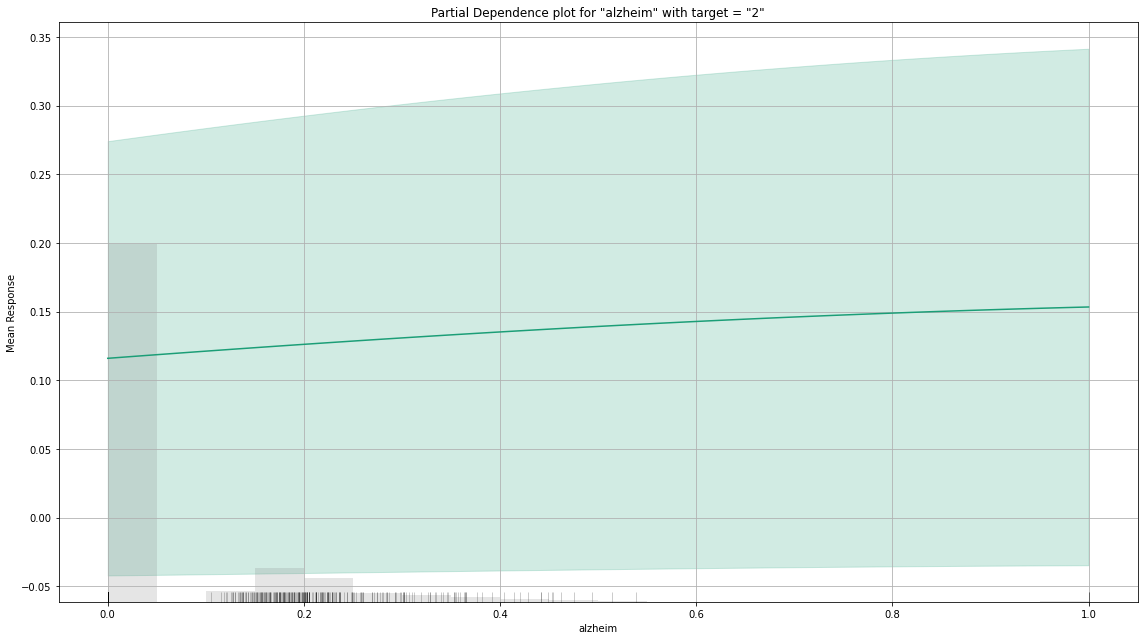

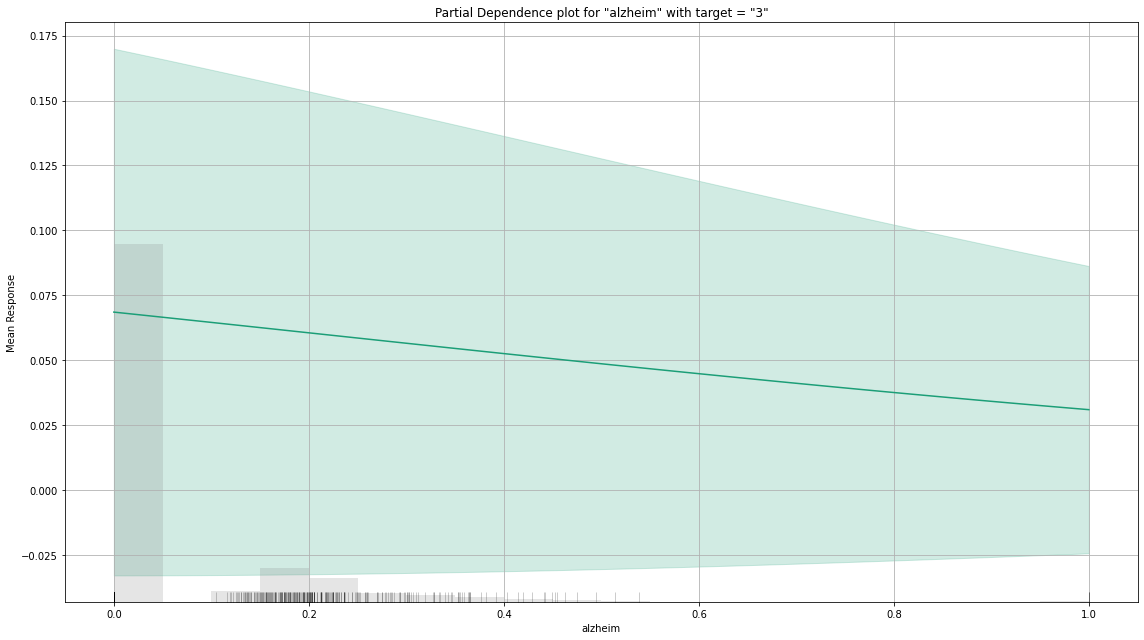

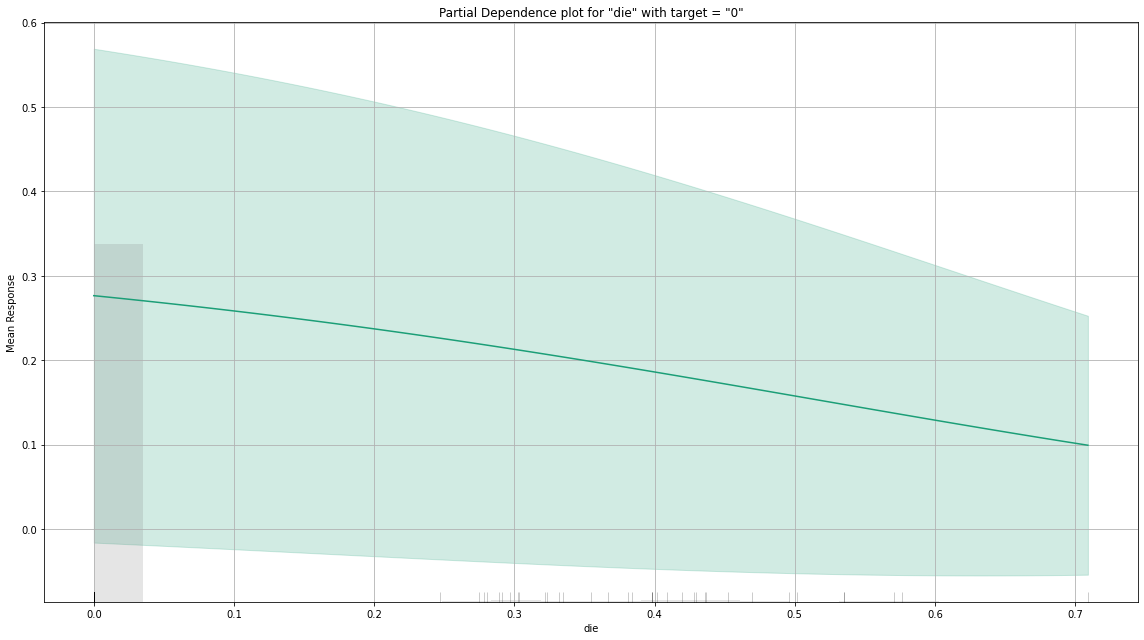

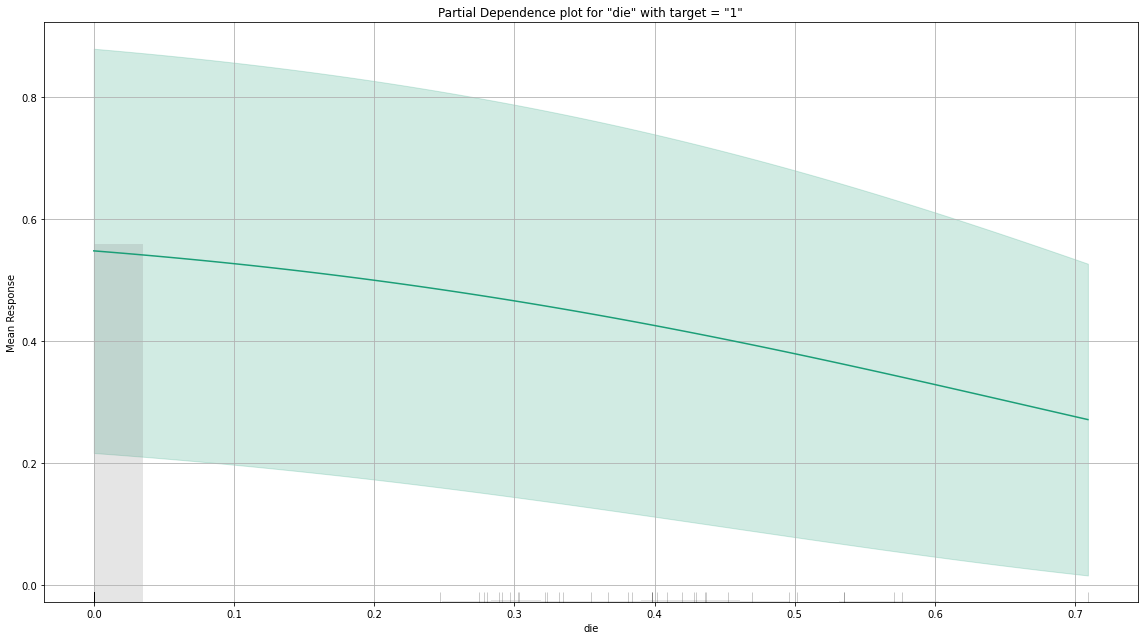

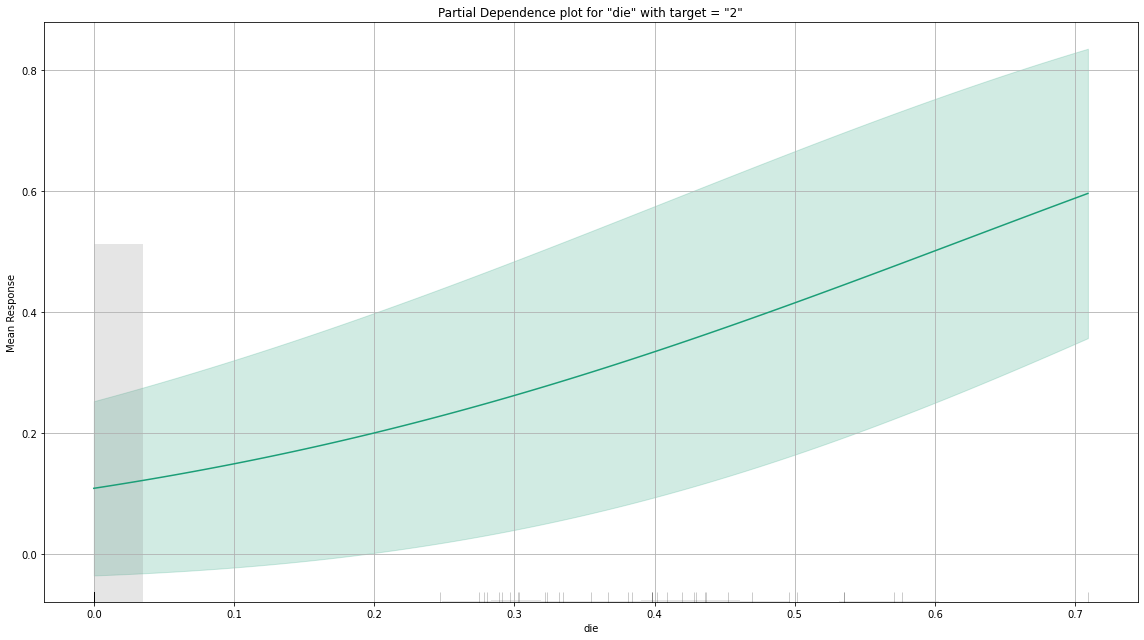

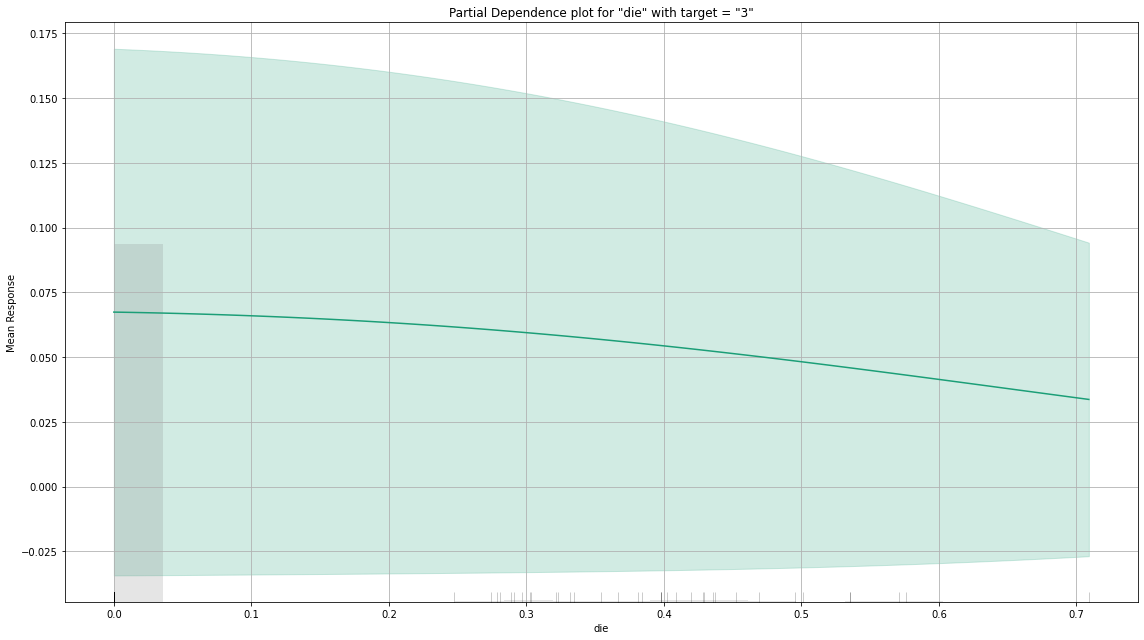

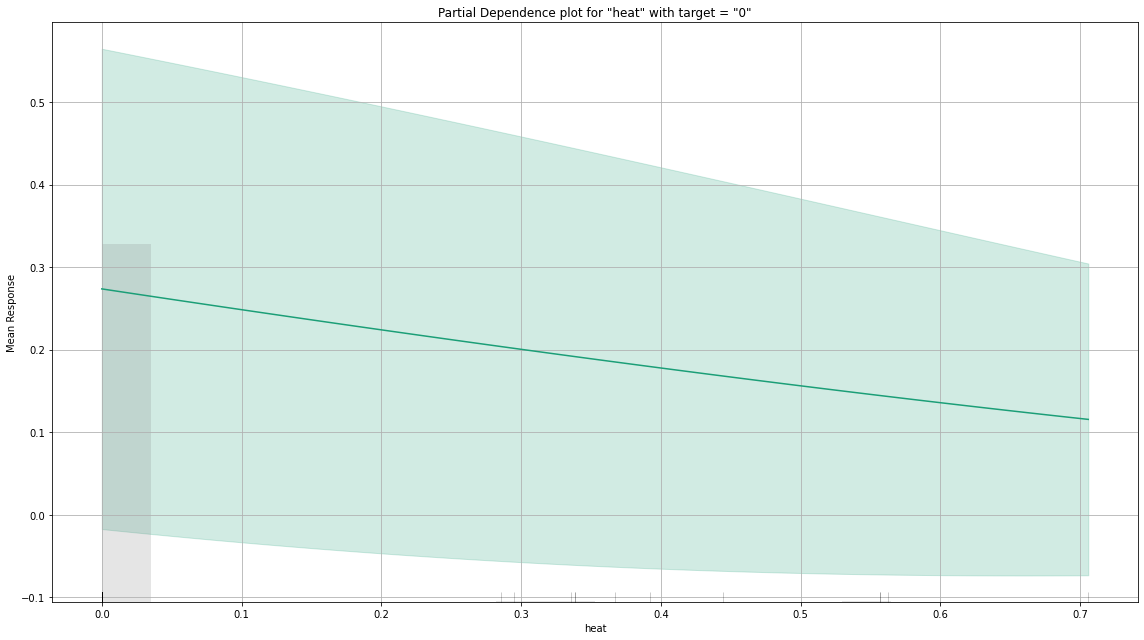

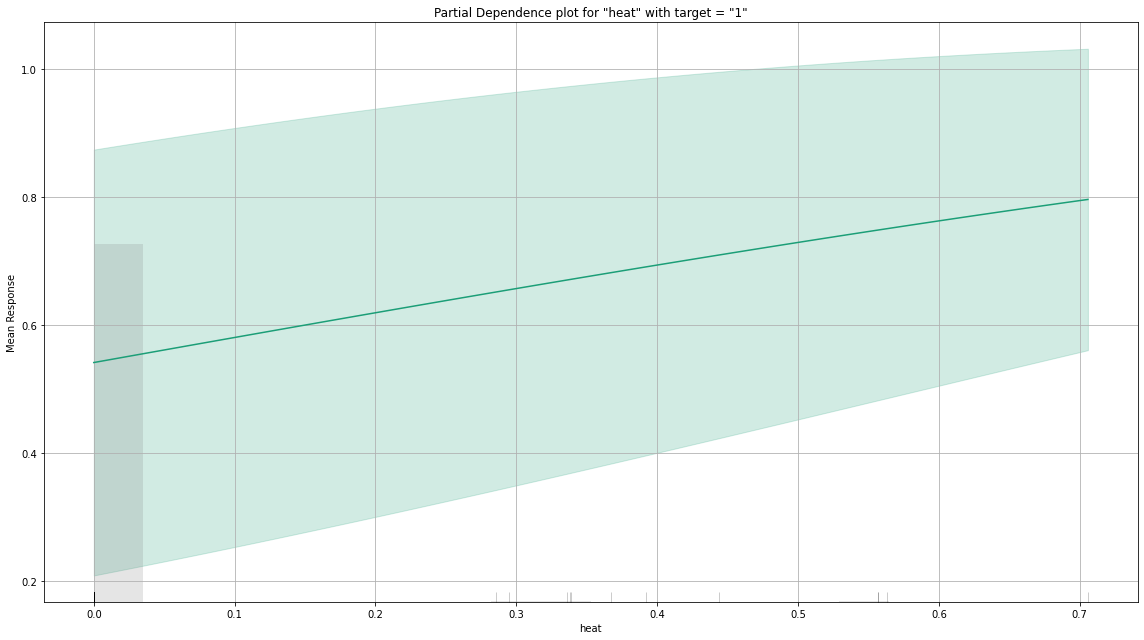

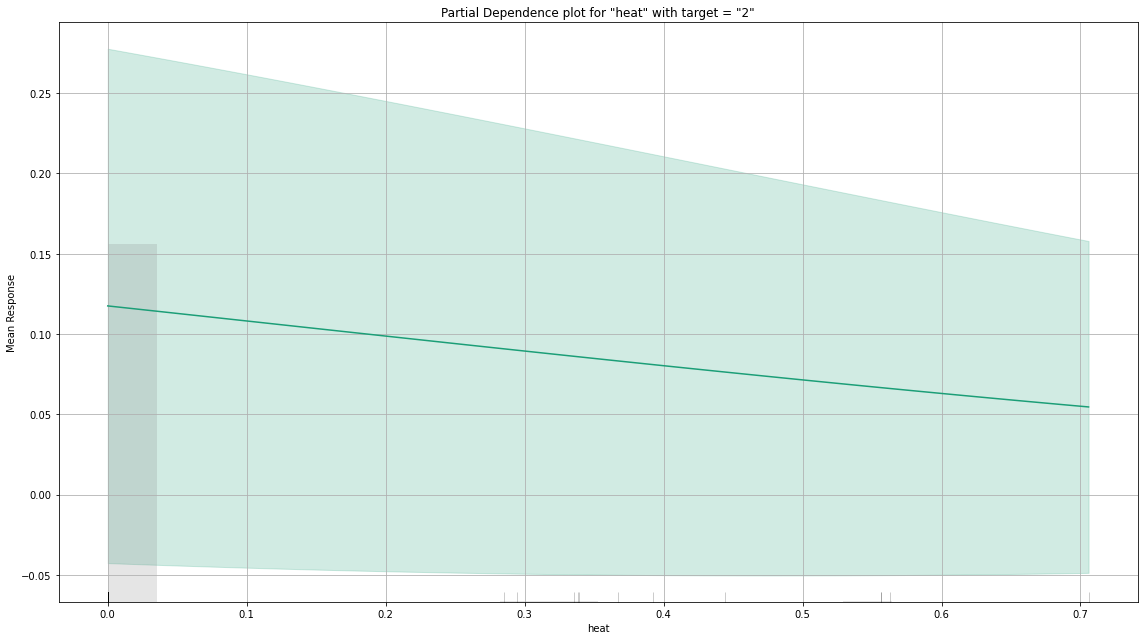

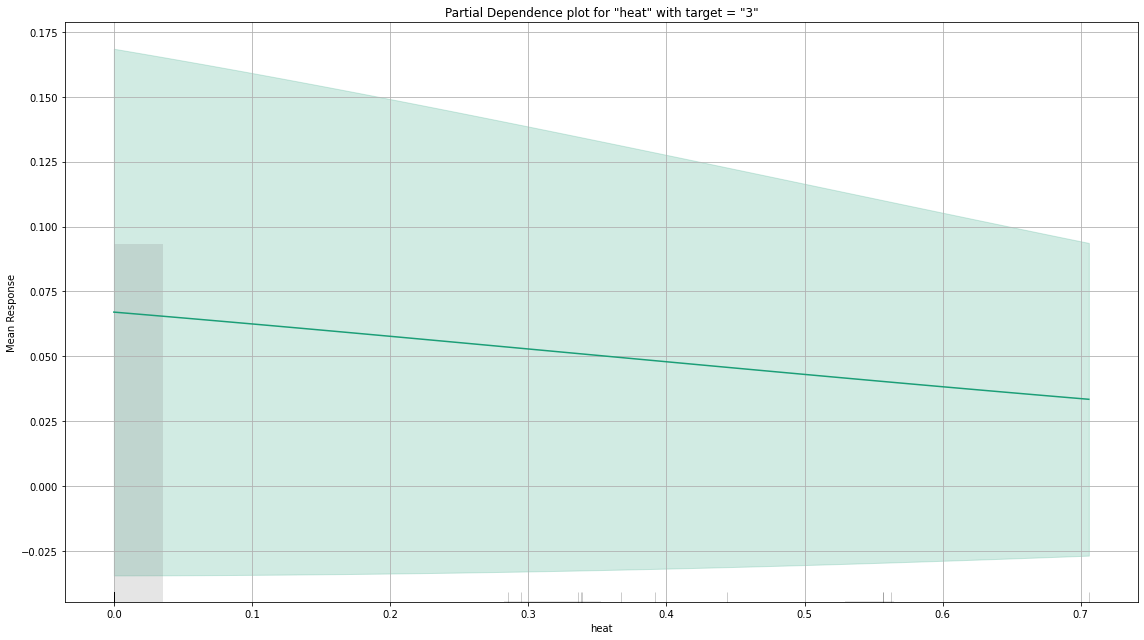

In [ ]:
# Explain an AutoML object
#exm = best_dl_model.explain(h2o_test_df)

In [ ]:
# # Retrieve the model's test performance
# tr_perf = best_dl_model.model_performance(h2o_train_df)
# tr_perf

# XGBoost Fine Tuning

In [ ]:
from h2o.estimators import H2OXGBoostEstimator

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',learn_rate= 0.5, col_sample_rate_per_tree= 0.5,
                          normalize_type="tree", ntrees =71,
                          seed=8924) # same seed as the one identified in automl

xgb.train(x = x, y = y, 
                   training_frame = h2o_train_df, validation_frame=h2o_val_set_df)

# Eval Test performance:
perf =  xgb.model_performance(h2o_test_df)
perf

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.20650655255105957
RMSE: 0.4544299203959391
LogLoss: 0.6725756413238179
Mean Per-Class Error: 0.4267278389343308
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,302.0,75.0,11.0,4.0,0.229592,90 / 392
1,44.0,649.0,16.0,28.0,0.119403,88 / 737
2,31.0,58.0,53.0,4.0,0.636986,93 / 146
3,15.0,46.0,1.0,24.0,0.720930,62 / 86
4,392.0,828.0,81.0,60.0,0.244673,"333 / 1,361"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.755327
1,2,0.910360
2,3,0.972814
3,4,1.000000


In [ ]:
## To examine Training Metrics
trperf =  xgb.model_performance(h2o_train_df)
trperf


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.07092102150920379
RMSE: 0.2663100101558403
LogLoss: 0.25579313192390146
Mean Per-Class Error: 0.10097655198816352
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,Error,Rate
0,650.0,35.0,0.0,1.0,0.052478,36 / 686
1,25.0,1364.0,2.0,1.0,0.020115,"28 / 1,392"
2,21.0,35.0,240.0,1.0,0.191919,57 / 297
3,12.0,10.0,1.0,142.0,0.139394,23 / 165
4,708.0,1444.0,243.0,145.0,0.056693,"144 / 2,540"



Top-4 Hit Ratios: 


,k,hit_ratio
0,1,0.943307
1,2,0.990551
2,3,0.998819
3,4,1.000000


# Gradient Boosting Machine Algorithm & Performance

In [ ]:
# from h2o.estimators import H2OGradientBoostingEstimator

# ## Build and train the model:
# pros_gbm = H2OGradientBoostingEstimator(seed=8888,
#                                         balance_classes=True,
#                                         nfolds=5,
#                                         keep_cross_validation_predictions = True)

# pros_gbm.train(x=x, y=y, training_frame=h2o_train_df, validation_frame=h2o_val_set_df)


In [ ]:
# ## Retrieve the model's test performance
# perf = pros_gbm.model_performance(h2o_test_df)
# perf

# Random Forest Algorithm & Performance


In [ ]:
# from h2o.estimators import H2ORandomForestEstimator

# # Build and train the model:
# drf = H2ORandomForestEstimator(ntrees=8888,binomial_double_trees=True)

# drf.train(x=x, y=y, training_frame=h2o_train_df, validation_frame=h2o_val_set_df)

# # Eval performance:
# perf = drf.model_performance(h2o_test_df)
# perf